In [1]:
from WallColumnDesign.core.wall_builder import WallBuilder
from WallColumnDesign.materials.concrete import Concrete
from WallColumnDesign.materials.steel import Steel
from WallColumnDesign.analysis.interaction_diagram import compute_interaction_diagram
from WallColumnDesign.tools.interaction_plotter import plot_interaction_diagram

In [2]:
# Define material properties
concrete = Concrete(fc=250.0, eps_cu=0.003)  # Concrete with compressive strength in kg/cm² and ultimate strain
steel = Steel(fy=4200.0, Es=2.0e6)           # Reinforcing steel with yield stress in kg/cm² and modulus of elasticity


In [3]:
builder = WallBuilder(
    concrete=concrete,
    steel=steel,

    cover=5,
    L1=650,
    thickness=30,
    inc_main=(2, 19),

    N1=100, W1=30, inc_N1=(3, 8),
    N2=100, W2=30, inc_N2=(3, 8),

    diam_main=1.0,
    diam_head1=1.8,
    diam_head2=1.8,  
    
    
    rho_web=2*(3.1415*(14/20)**2) / (10*30),
    hw=350,

)


In [4]:
# builder = WallBuilder(
#     concrete=concrete,
#     steel=steel,

#     cover=3,
#     L1=230,
#     thickness=30,
#     inc_main=(2, 15),

#     N1=25, W1=30, inc_N1=(2, 4),
#     N2=25, W2=30, inc_N2=(2, 4),

#     diam_main=1.6,
#     diam_head1=1.2,
#     diam_head2=1.2,  

#     rho_web=2*(3.1415*(12/20)**2) / (15*25),
#     hw=350,
# )


In [5]:
# builder = WallBuilder(
#     concrete=concrete,
#     steel=steel,

#     cover=6,
#     L1=40,
#     thickness=40,
#     inc_main=(4, 4),

#     N1=0.001, W1=0.001, inc_N1=(0,0),
#     N2=0.001, W2=0.001, inc_N2=(0,0),

#     diam_main=1.6,
#     diam_head1=1.6,
#     diam_head2=1.6,  
# )


Head 1 polygon: [(0.0, 550), (30.0, 550), (30.0, 650), (0.0, 650)]
Head 2 polygon: [(0.0, 0), (30.0, 0), (30.0, 100), (0.0, 100)]
Web polygon: [(0.0, 100), (30.0, 100), (30.0, 550), (0.0, 550)]


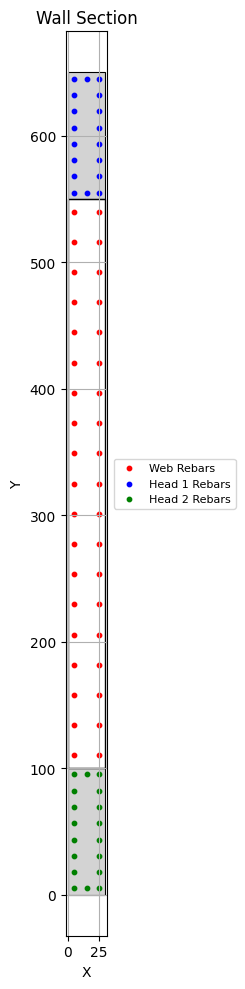

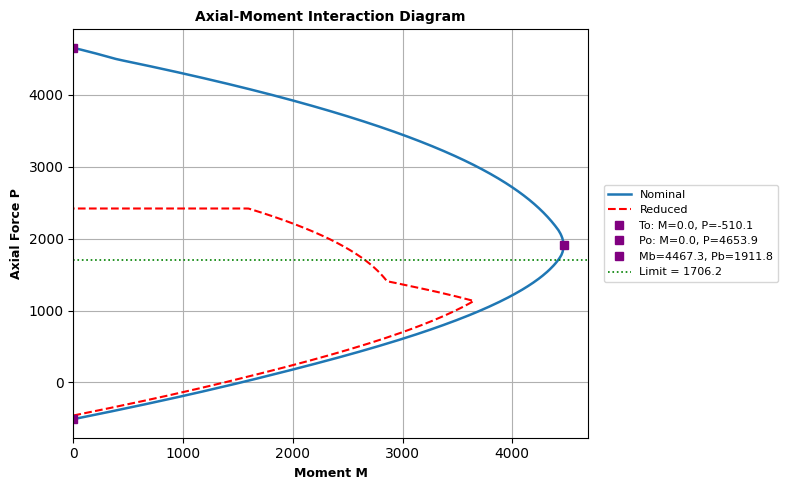

In [6]:
# Generate wall geometry and reinforcement bars
builder.section.generate_geometry()
builder.section.generate_rebars()

# Print vertices of each region separately
print("Head 1 polygon:", builder.section.polygon_head_1)
print("Head 2 polygon:", builder.section.polygon_head_2)
print("Web polygon:", builder.section.polygon_web)

# Plot the complete wall section
builder.build(plot=True)


In [7]:
print("To =", builder.To)
print("Po =", builder.Po)
print("Mb =", builder.Mb)
print("Pb =", builder.Pb)
print("RestPo =", builder.RestPo)

To = -510.1061404736818
Po = 4653.856682348682
Mb = 4467.320738712526
Pb = 1911.8126679698908
RestPo = 1706.25


In [8]:
print("Ag =", builder.Ag)
print("rho total =", builder.rho_main*100)
print("rho cabezal 1 =", builder.rho_head1*100)
print("rho cabezal 2 =", builder.rho_head2*100)

Ag = 19500
rho total = 0.15305194979027195
rho cabezal 1 = 0.2348944660991753
rho cabezal 2 = 0.2348944660991753


In [9]:
builder.results_Vn

{'Vc': 246.6576574931336,
 'Vs': 840.4769100000001,
 'Vn': 1087.1345674931338,
 'Vn_max': 653.642792356804,
 'phi_Vn': 652.2807404958802,
 'phi_Vn_max': 392.1856754140824}

In [10]:
builder.results_Vn['phi_Vn']*9806.65/1e3

6396.688923783923